In [131]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
from itertools import combinations, groupby
import copy 


In [53]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [221]:

n = 5
theta = .5
# G = nx.barabasi_albert_graph(100,2)
# G = nx.geographical_threshold_graph(n, theta)
# G = nx.random_geometric_graph(n, theta)
G = gnp_random_connected_graph(n,theta)

class graph_env():
    def __init__(self, G, numofhome = 1, numofblackout = 1, numofblackoutws = 0, numofchargingstation = 0, action_limit = 3):
        """Takes in a randomly generated graph, and keeps track of ep infomation
        numofhome - number of homes for agent starting point
        numofblackout - number of houses with blackout
        numofblackout - number of houses with solarpower
        """
        # self.ev = ev
        self.day = 0
        self.actionsdone = 0
        self.action_limit = 1 if ((action_limit -1) < -1)  else  action_limit - 1 #action limit can't be less than 0
        self.graph = G
        self.color_map = []

        self.allnodes = list(G.nodes())
        self.node_status = dict.fromkeys(self.allnodes,0)
        

        self.home_nodes, buffer_nodes = self.init_update_graph(self.allnodes, numofhome,5)
        self.blackws_nodes, buffer_nodes = self.init_update_graph(buffer_nodes, numofblackoutws,2)
        self.black_nodes, buffer_nodes = self.init_update_graph(buffer_nodes, numofblackout,1)
        self.charging_nodes, buffer_nodes = self.init_update_graph(buffer_nodes, numofchargingstation,4)

        self.EV_locations = copy.deepcopy(self.home_nodes)
        # self.EV_locations = {self.home_nodes: 1000}

        try:
            del self.node_status[None]
        except KeyError: 
            pass


    def init_update_graph(self,nodes,num_to_update,val):
        nodes_to_updates, buffer_nodes = self.remove_node(nodes, num_to_update)
        for node in nodes_to_updates:
            # print(home)
            node_update = {node: val}
            self.node_status.update(node_update)
        return nodes_to_updates, buffer_nodes

    def remove_node(self,nodes, numtoremove=1):
        if numtoremove < 1:
            return [None], nodes
        nodes = list(nodes)
        samples = random.sample(nodes, 1)
        new_nodes = list(set(nodes).symmetric_difference(set(samples)))
        return samples, new_nodes

    def power_check(self):
        "read from blackout data to figure out if power is back or not 1,2 -> 3 "
        pass
    def env_close():
        pass

    def next_day_check(self):
        if self.actionsdone > self.action_limit:
            self.day += 1
            self.actionsdone = 0
    
    def movement_options(self, ev = None):
        if ev == None: 
            ev = self.EV_locations[0]
        routes = self.graph.edges(ev)
        return routes
    
    def update_ev_location(self, ev_loc=None,ev_update = None):
        "ev_update - edge: (s,t), ev - node: s"

        if ev_loc == None: 
            ev_loc = self.EV_locations[0]
        ev_index = self.EV_locations.index(ev_loc)
        if ev_update == None:
            routes = self.graph.edges(ev_loc)
            ev_update = random.sample(list(routes), 1)[0]
        
        # print(ev)
        # print(f'new location: {ev_update}')
        # print(f'EV_index: {ev_index}')
        if ev_loc == ev_update[0]:
            new_ev_loc = ev_update[1]
        else: 
            new_ev_loc = ev_update[0]
        print(f'new location: {new_ev_loc}')
        self.EV_locations[ev_index] = new_ev_loc
    

    def plot_nodes(self, update = True):
        if update == True: 
            self.color_map = []
            self.size_map = []
            # self.shape_map = []
            # print(f'current locations: {self.EV_locations}')
            for key, val in self.node_status.items():
                if val == 1:
                    self.color_map.append('red')
                    # self.shape_map.append(300)
                elif val == 2:
                    self.color_map.append('orange')
                    # self.shape_map.append(300)
                elif val == 4:
                    self.color_map.append('yellow')
                    # self.shape_map.append(300)
                elif val == 5:
                    self.color_map.append('green')
                else:
                    self.color_map.append('blue')

                if key in self.EV_locations:
                    # print(f'current location: {key}')
                    self.size_map.append(1000)
                else:
                    self.size_map.append(300)

        else:       
            pass
        nx.draw(self.graph, node_color=self.color_map, node_size = self.size_map, with_labels=True)
    
    def plot_nodes_c(self, update = True):
        if update == True: 
            self.color_map = []
            for key, val in self.node_status.items():
                self.color_map.append(f'C{val}')
                if key in self.EV_locations:
                    # print(key)
                    self.size_map.append(1000)
                else:
                    self.size_map.append(300)
        else:       
            pass
        nx.draw(self.graph, node_color=self.color_map, node_size = self.size_map, with_labels=True)
        

env = graph_env(G)

print(env.node_status)




{0: 0, 1: 0, 2: 0, 3: 1, 4: 5}


new location: 3


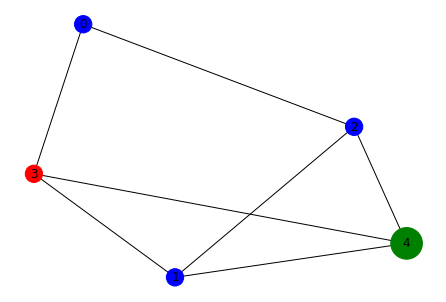

In [226]:
env.plot_nodes()
env.update_ev_location()


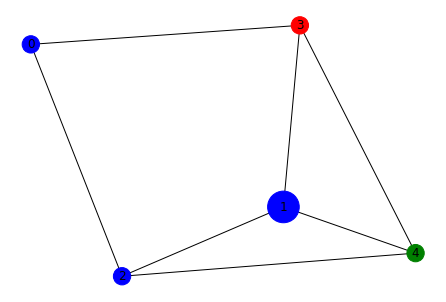

In [224]:
env.plot_nodes()

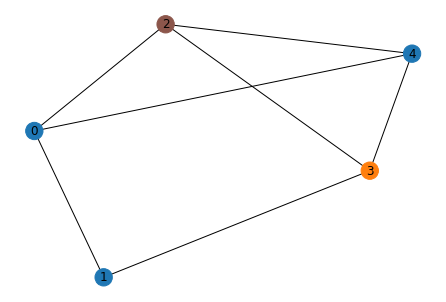

In [171]:
env.plot_nodes_c()

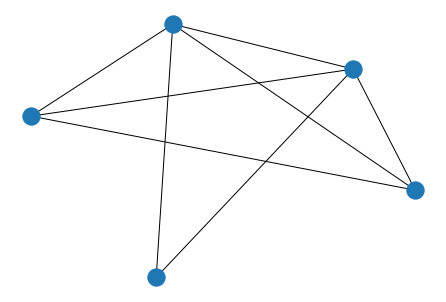

In [92]:
nx.draw_spring(G)

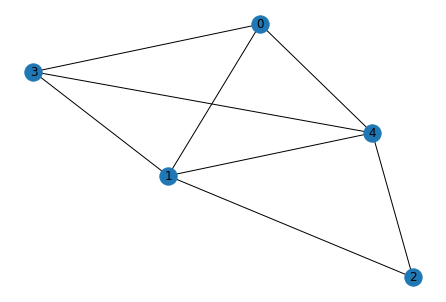

In [93]:
nx.draw(G, with_labels=1)

(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

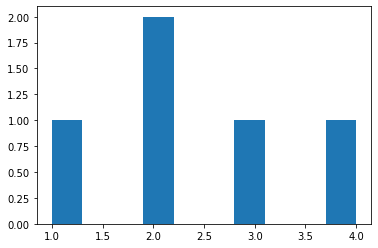

In [5]:
plt.hist([v for k,v in nx.degree(G)])

(array([1., 0., 2., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.57142857, 0.61428571, 0.65714286, 0.7       , 0.74285714,
        0.78571429, 0.82857143, 0.87142857, 0.91428571, 0.95714286,
        1.        ]),
 <a list of 10 Patch objects>)

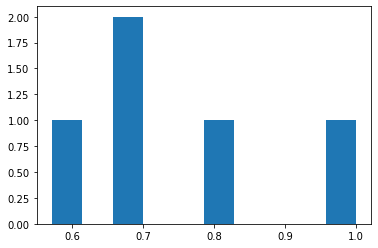

In [6]:
plt.hist(nx.centrality.closeness_centrality(G).values())

In [7]:
nx.diameter(G)

2

In [8]:
nx.cluster.average_clustering(G)

0.6

In [40]:
nodes = list(G.nodes())
samples = sample(nodes, 1)
new_nodes = list(set(nodes).symmetric_difference(set(samples)))
print(nodes)
print(samples)
print(new_nodes)

[0, 1, 2, 3, 4]
[1]
[0, 2, 3, 4]


In [12]:
nodes

[0, 1, 2, 3, 4]

In [20]:
samples = sample(nodes, 1)

In [22]:
samples

[4]

In [30]:

test = sample([1,2,3,4,5], 4)

In [31]:
test

[5, 3, 4, 1]

In [41]:
list([1,2,3])

[1, 2, 3]

In [124]:
A = np.random.rand(n,n)
# B = A@A.T
np.triu(A)

array([[0.339847  , 0.65974224, 0.88260092, 0.30617892, 0.24444623],
       [0.        , 0.44091625, 0.16025576, 0.15463665, 0.05283788],
       [0.        , 0.        , 0.60898168, 0.25266343, 0.19165567],
       [0.        , 0.        , 0.        , 0.58737544, 0.18228999],
       [0.        , 0.        , 0.        , 0.        , 0.74234514]])

In [56]:
# https://plotly.com/python/network-graphs/
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python



n = 5
theta = .5
# G = nx.barabasi_albert_graph(100,2)
# G = nx.geographical_threshold_graph(n, theta)
# G = nx.random_geometric_graph(n, theta)
G = gnp_random_connected_graph(n,.5)

class _graph_env():
    "Takes in a randomly generated graph, and keeps track of ep infomation"
    def __init__(self, G, numofhome = 1, numofblackout = 1, numofblackoutwps =0):
        self.allnodes = list(G.nodes())
        self.home, buffer_nodes = self.remove_node(self.allnodes, numofhome)
        self.clientwpowerstation, buffer_nodes = self.remove_node(buffer_nodes, numofblackoutwps)
        self.client, buffer_nodes = self.remove_node(buffer_nodes, numofblackout)
        self.buffer_nodes = buffer_nodes
        # print(G.edges(node))

    def remove_node(self,nodes, numtoremove=1):
        if numtoremove < 1:
            return None, nodes
        nodes = list(nodes)
        samples = random.sample(nodes, 1)
        new_nodes = list(set(nodes).symmetric_difference(set(samples)))
        return samples, new_nodes

# env = graph_env(G)

# print(env.home)
# print(env.clientwpowerstation)
# print(env.client)
# print(env.buffer_nodes)




[1]
None
[0]
[2, 3, 4]
